<a href="https://colab.research.google.com/github/Aryan-Gupta2002/Deep-Learning---Tensorflow/blob/main/neuralNetworkForRegression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From previous notebook of neural networks for regression analysis

###Evaluating a model  
In practice, a typical workflow , we go through when building a neural network  
Build a model -> fit it -> evaluate it -> tweak the model -> fit it-> evaluate-> repeat  

It's a good idea to visualize the training process :
  
*The data- What are we working with ?  
*The model itself- What does our model look like ?  
*Training the model - how does the model perform ?  
*The prediction of the model - Have a idea about the prediction  

### Making a larger Dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
print(tf.__version__,np.__version__,matplotlib.__version__)

2.19.0 2.0.2 3.10.0


In [2]:
x = tf.range(-100,100,4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [3]:
y = x+12
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-88, -84, -80, -76, -72, -68, -64, -60, -56, -52, -48, -44, -40,
       -36, -32, -28, -24, -20, -16, -12,  -8,  -4,   0,   4,   8,  12,
        16,  20,  24,  28,  32,  36,  40,  44,  48,  52,  56,  60,  64,
        68,  72,  76,  80,  84,  88,  92,  96, 100, 104, 108], dtype=int32)>

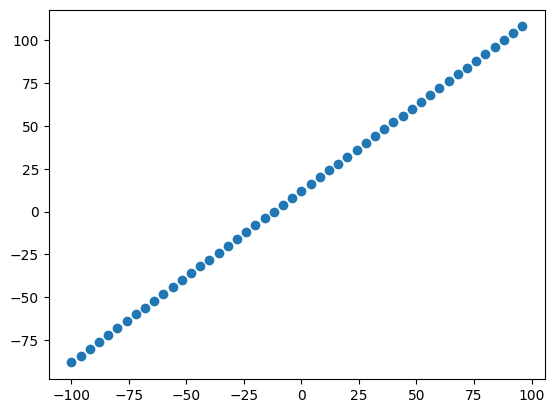

In [4]:
plt.scatter(x,y)

In [5]:
# import tensorflow_datasets as tfds
# ds_train = tfds.load('x', split='train[:75%]')

### The 3 sets of data we need to properly optimize our model  
•Training Set  
•Validation Set (OPTIONAL)  
•Test Set
### Goal: **Generalization** is the ability of a machine learning model to perform well on data, it has not seen before

In [6]:
# Checking how many samples we have
len(x)

50

In [7]:
#Splittimg the data into training and testing sets
x_train = x[:40]
y_train = y[:40]

x_test=x[40:]
y_test =y[40:]
len(x_test),len(x_train),len(y_test),len(y_train)

(10, 40, 10, 40)

###Visualizing the data
Now we seperated out data, we must visualize

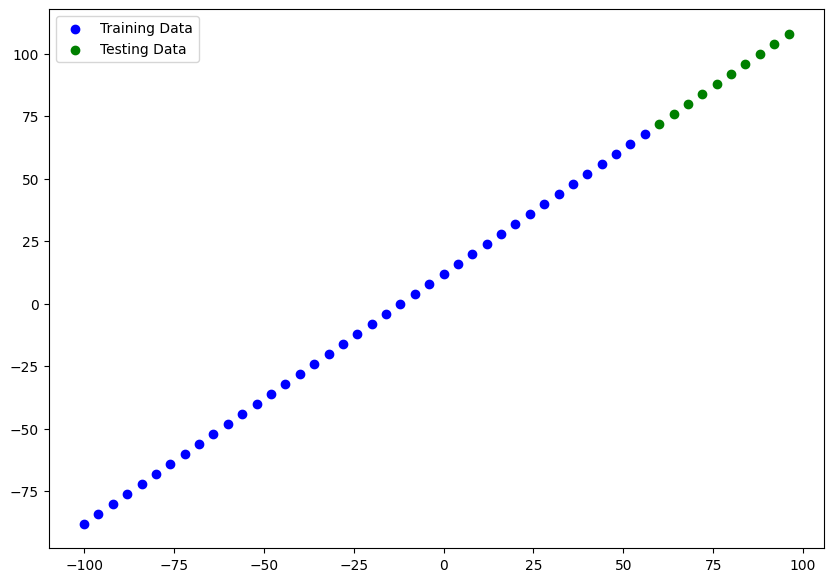

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,c="b",label="Training Data")
plt.scatter(x_test,y_test,c="g",label="Testing Data")
plt.legend() #legend() gives information about the different datasets

In [9]:
#Let's Train our model from the above datasets
model1=tf.keras.Sequential([
    tf.keras.layers.Dense(3),
    tf.keras.layers.Dense(1)
])
model1.compile(
    loss=tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
model1.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 36.8722 - mae: 36.8722 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 16.3932 - mae: 16.3932
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 15.3466 - mae: 15.3466
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 21.2015 - mae: 21.2015
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.3153 - mae: 12.3153
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 18.0287 - mae: 18.0287
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 19.2899 - mae: 19.2899
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 25.3642 - mae: 25.3642
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 13.8423 - mae: 13.8423
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 16.9206 - mae: 16.9206
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.1871 - mae: 10.1871
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 15.2439 - mae: 15.2439
Epoch 13/100
2/2 ━━━━━━━

### Visualizing Our Model

In [10]:
# input shape tells us, how many input variables are there for each sample
x[0].shape,y[0].shape

(TensorShape([]), TensorShape([]))

In [11]:
tf.random.set_seed(42)
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(2,input_shape=[1],name="Input layer name"),
    tf.keras.layers.Dense(1,name="Second Hidden"),
    tf.keras.layers.Dense(1,name="Output layer")
],name="One of the many models...")
model2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model2.summary()

Model: "One of the many models..."

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input layer name (Dense)        │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Second Hidden (Dense)           │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output layer (Dense)            │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

* Total Params - total no. of parameters in the model.  
*Trainable params- These are the parameters the model can update as it learns  
*Non-trainable params- These params are not updated during training. (this typically occurs when we bring in already learned parameters from models during **transfer learning**)  
**Resource** MITs Introduction to Deep Learning course

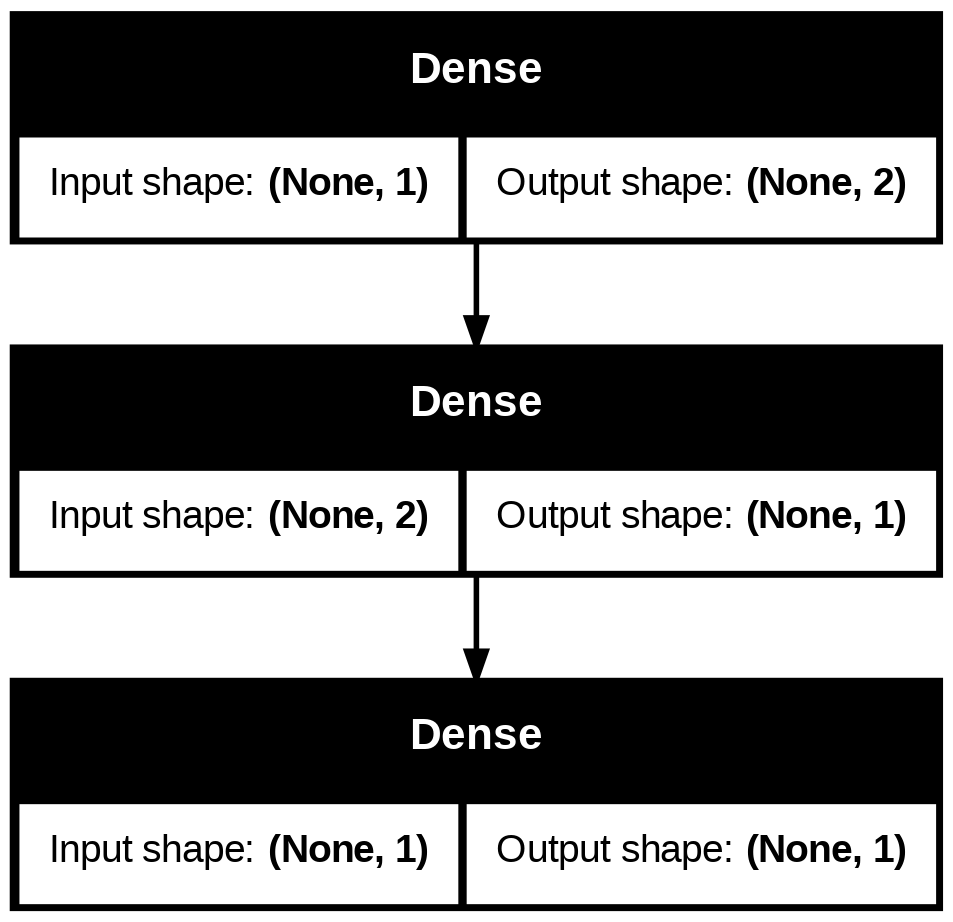

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model=model2,show_shapes=True)

###Visualizing our model's prediction

In [14]:
y_pred=model1.predict(x_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[ 65.44777 ],
       [ 69.666664],
       [ 73.88556 ],
       [ 78.104454],
       [ 82.32335 ],
       [ 86.542244],
       [ 90.76114 ],
       [ 94.980034],
       [ 99.19893 ],
       [103.41782 ]], dtype=float32)

In [15]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 72,  76,  80,  84,  88,  92,  96, 100, 104, 108], dtype=int32)>

###Creating a Plotting function

In [16]:
def plot_prediction(training_data=x_train,
                    training_labels=y_train,
                    test_data=x_test,
                    test_labels=y_test,
                    predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(training_data,training_labels,c="b",label="training data")
  plt.scatter(test_data,test_labels,c="g",label="test data")
  #Plotting model's predictions in red
  plt.scatter(test_data ,predictions,c="r",label="Predictions")
  plt.legend()

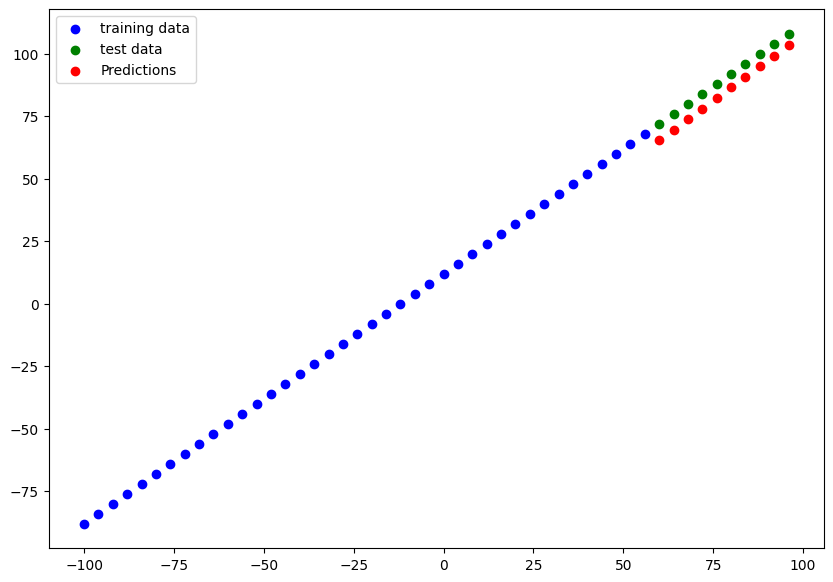

In [17]:
plot_prediction()